<a href="https://colab.research.google.com/github/saran2811/Time-Series-Patient-data/blob/main/TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.utils import shuffle


In [ ]:
book_train = pd.read_parquet('/content/train.parquet')

In [ ]:
book_train['Date']=[pd.to_datetime(x) for x in book_train['Date']]

In [ ]:
book_train.reset_index(inplace=True,drop=True)

In [ ]:
len(book_train)

3220868

In [ ]:
book_train.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [ ]:
target_index=book_train[book_train['Incident']=='TARGET DRUG']['Patient-Uid'].unique()


In [ ]:
len(book_train)

3220868

In [ ]:
book_train.nunique()

Patient-Uid    27033
Date            1977
Incident          57
dtype: int64

In [ ]:
new_df=book_train.iloc[0:0]

In [ ]:
new_df

,Patient-Uid,Date,Incident


In [ ]:
train_copy=book_train.copy()

In [ ]:
train_copy


,Patient-Uid,Date,Incident
956739,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9
...,...,...,...
3117129,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6
3195685,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG
2539655,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1
2236741,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG


In [ ]:
train_copy.sort_values(by=['Patient-Uid','Date'],inplace=True)

In [ ]:
df=dict(list(train_copy.groupby('Patient-Uid')))

In [ ]:
p=df['a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f']
p.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [ ]:
for i in df.keys():
  df[i].set_index(df[i]['Date'],drop=True,inplace=True)

# *Finding Patients given Target drug*

In [ ]:
for i in df.keys():
  if i in target_index:
   for j in list(df[i].index):
     tra_dat=list(df[i][df[i]['Incident']=='TARGET DRUG'].Date)[0]
     date=list(pd.date_range(end=tra_dat,periods=30,freq='D'))
     if j in date:
       t=df[i].loc[:j,:]
   new_df=pd.concat([new_df,t],ignore_index=True)




In [ ]:
new_df

,Patient-Uid,Date,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-04-14,DRUG_TYPE_7
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,TEST_TYPE_0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_0
3,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_8
4,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_7
...,...,...,...
974989,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-04-10,DRUG_TYPE_1
974990,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,PRIMARY_DIAGNOSIS
974991,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,TEST_TYPE_1
974992,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,TEST_TYPE_2


In [ ]:
new_df1=pd.get_dummies(new_df['Incident'])

In [ ]:
new_df1

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974989,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
974992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
new_df1=pd.concat([new_df,new_df1],axis=1)


In [ ]:
new_df1.drop(['Incident','Date','TARGET DRUG'],axis=1,inplace=True)

In [ ]:
new_df1


,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974989,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974990,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974991,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
974992,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
col=list(new_df1.columns[1:])

In [ ]:
new_df1=new_df1.groupby('Patient-Uid')[col].sum()

In [ ]:
new_df1['Target Drug']=1

In [ ]:
new_df1

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Target Drug
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,6.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,1
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,12.0,17.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,41.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,18.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,7.0,48.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1


# *Finding Patients not given Target drug*

In [ ]:
nontarget=book_train.iloc[0:0]

In [ ]:
nontarget

,Patient-Uid,Date,Incident


In [ ]:
for i in df.keys():
  if i not in target_index:
     g=df[i]
     nontarget=pd.concat([nontarget,g],ignore_index=True)

In [ ]:
nontarget

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9
...,...,...,...
1784074,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-06-17,DRUG_TYPE_1
1784075,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-07-14,PRIMARY_DIAGNOSIS
1784076,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-07-14,DRUG_TYPE_1
1784077,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-08-06,DRUG_TYPE_1


In [ ]:
 non_target=pd.get_dummies(nontarget['Incident'])


In [ ]:
non_target=pd.concat([nontarget,non_target],axis=1)

In [ ]:
non_target.drop(['Incident','Date'],axis=1,inplace=True)
col1=list(non_target.columns[1:])
non_target=non_target.groupby('Patient-Uid')[col1].sum()

In [ ]:
non_target['Target Drug']=0

In [ ]:
non_target

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Target Drug
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6.0,7.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2.0,45.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,0.0,9.0,27.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0e9c298-1c7c-11ec-954b-16262ee38c7f,4.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
a0e9c2c7-1c7c-11ec-9b2e-16262ee38c7f,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0
a0e9c2f7-1c7c-11ec-8bac-16262ee38c7f,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0


# *Dataframe with both Patients given Target drug and not*

In [ ]:
Patient_df=pd.concat([new_df1,non_target])


In [ ]:
Patient_df.fillna(0.0,inplace=True)

In [ ]:
Patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27033 entries, a0e9c384-1c7c-11ec-81a0-16262ee38c7f to a0e9c354-1c7c-11ec-84f5-16262ee38c7f
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DRUG_TYPE_0        27033 non-null  float64
 1   DRUG_TYPE_1        27033 non-null  float64
 2   DRUG_TYPE_10       27033 non-null  float64
 3   DRUG_TYPE_11       27033 non-null  float64
 4   DRUG_TYPE_12       27033 non-null  float64
 5   DRUG_TYPE_13       27033 non-null  float64
 6   DRUG_TYPE_14       27033 non-null  float64
 7   DRUG_TYPE_15       27033 non-null  float64
 8   DRUG_TYPE_16       27033 non-null  float64
 9   DRUG_TYPE_17       27033 non-null  float64
 10  DRUG_TYPE_2        27033 non-null  float64
 11  DRUG_TYPE_3        27033 non-null  float64
 12  DRUG_TYPE_4        27033 non-null  float64
 13  DRUG_TYPE_5        27033 non-null  float64
 14  DRUG_TYPE_6        27033 non-null  float64
 15  DRUG_TYPE

In [ ]:
Patient_df.reset_index(inplace=True)

In [ ]:
Patient_df=shuffle(Patient_df)
Patient_df.reset_index(inplace=True,drop=True)

In [ ]:
Patient_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Target Drug,DRUG_TYPE_18
0,a0e845e6-1c7c-11ec-ad6a-16262ee38c7f,41.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,a0efd0b6-1c7c-11ec-a0d8-16262ee38c7f,1.0,1.0,11.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1,0.0
2,a0dcce4d-1c7c-11ec-9568-16262ee38c7f,21.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,a0ded131-1c7c-11ec-8dd2-16262ee38c7f,4.0,42.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,a0de7a6f-1c7c-11ec-afb3-16262ee38c7f,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35.0,1.0,1.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,a0df29ed-1c7c-11ec-aee8-16262ee38c7f,18.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0
27029,a0e31947-1c7c-11ec-9538-16262ee38c7f,13.0,8.0,17.0,2.0,0.0,2.0,0.0,6.0,0.0,...,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0,0.0
27030,a0edd4bc-1c7c-11ec-9226-16262ee38c7f,19.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1,0.0
27031,a0e8702f-1c7c-11ec-81db-16262ee38c7f,1.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
l=[len(Patient_df[Patient_df['Target Drug']==1]),len(Patient_df[Patient_df['Target Drug']==0])]

# **Plotting counts of patients given target drug and not given target drug**

In [ ]:
Patient_df['Target Drug'].value_counts()

0    17659
1     9374
Name: Target Drug, dtype: int64

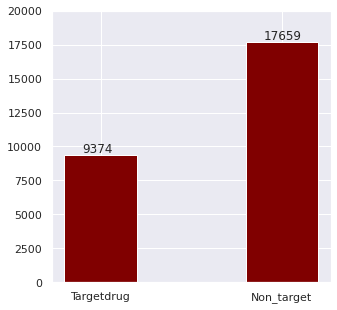

In [ ]:
fig = plt.figure(figsize = (5, 5))
# creating the bar plot
plt.bar(['Targetdrug','Non_target'], l, color ='maroon',width = 0.4)
plt.text(x=-.1,y=l[0]+ 200, s=str(l[0]))
plt.text(x=0.9,y=l[1]+ 200, s=str(l[1]))
plt.ylim(0,20000)
plt.show()

In [ ]:
Patient_df.corr()['Target Drug']

DRUG_TYPE_0         -0.117774
DRUG_TYPE_1         -0.161045
DRUG_TYPE_10         0.013136
DRUG_TYPE_11         0.118308
DRUG_TYPE_12         0.018473
DRUG_TYPE_13         0.023940
DRUG_TYPE_14         0.018513
DRUG_TYPE_15         0.014482
DRUG_TYPE_16         0.018041
DRUG_TYPE_17        -0.031800
DRUG_TYPE_2          0.262028
DRUG_TYPE_3          0.111783
DRUG_TYPE_4         -0.110549
DRUG_TYPE_5         -0.115315
DRUG_TYPE_6         -0.121944
DRUG_TYPE_7          0.089996
DRUG_TYPE_8         -0.148316
DRUG_TYPE_9          0.094826
PRIMARY_DIAGNOSIS    0.107684
SYMPTOM_TYPE_0       0.113334
SYMPTOM_TYPE_1       0.059224
SYMPTOM_TYPE_10     -0.008689
SYMPTOM_TYPE_11     -0.002176
SYMPTOM_TYPE_12     -0.009214
SYMPTOM_TYPE_13      0.016740
SYMPTOM_TYPE_14     -0.003586
SYMPTOM_TYPE_15      0.027722
SYMPTOM_TYPE_16     -0.005239
SYMPTOM_TYPE_17     -0.008393
SYMPTOM_TYPE_18     -0.001338
SYMPTOM_TYPE_19      0.014087
SYMPTOM_TYPE_2       0.016480
SYMPTOM_TYPE_20      0.001499
SYMPTOM_TY

# **Importing Test Dataset for prediction**

In [ ]:
test_df=pd.read_parquet('/content/test.parquet')
test_df

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [ ]:
test_df['Incident'].unique()

array(['SYMPTOM_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_2', 'DRUG_TYPE_1',
       'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_8', 'TEST_TYPE_0', 'DRUG_TYPE_7',
       'DRUG_TYPE_11', 'SYMPTOM_TYPE_6', 'DRUG_TYPE_5', 'DRUG_TYPE_6',
       'DRUG_TYPE_9', 'DRUG_TYPE_15', 'TEST_TYPE_3', 'SYMPTOM_TYPE_3',
       'TEST_TYPE_1', 'DRUG_TYPE_3', 'TEST_TYPE_2', 'SYMPTOM_TYPE_7',
       'DRUG_TYPE_12', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_10',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_29',
       'DRUG_TYPE_13', 'SYMPTOM_TYPE_21', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_19',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'TEST_TYPE_4', 'DRUG_TYPE_10',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_24',
       'DRUG_TYPE_16', 'SYMPTOM_TYPE_13', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_22',
       'DRUG_TYPE_1

In [ ]:
test_dum=pd.get_dummies(test_df['Incident'])

In [ ]:
test_copy=test_df.copy()

In [ ]:
test_copy=pd.concat([test_copy,test_dum],axis=1)

In [ ]:
test_copy.drop(['Date','Incident'],inplace=True,axis=1)

In [ ]:
test_col=list(test_copy.columns[1:])

In [ ]:
test_copy=test_copy.groupby('Patient-Uid')[test_col].sum().reset_index()

In [ ]:
test_copy

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2.0,30.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# *Preparing Train and Test Data for model perparation*

In [ ]:
T_list=list(test_copy.columns[1:])

In [ ]:
test_x=test_copy[T_list]

In [ ]:
x_train=Patient_df[T_list]

In [ ]:
y_train=Patient_df["Target Drug"]

# *Train and Test split*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.40,random_state=101)

# *Creating Model*

Scaling input featurees

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
test_x= sc.fit_transform(test_x)

**Creating Model Using Tensorflow**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

In [ ]:
model.add(Dense(23))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation ='sigmoid')) 

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),batch_size=250 , epochs=100)

Epoch 1/100
46/46 [==============================] - 0s 10ms/step - loss: 0.2295 - accuracy: 0.9154 - val_loss: 0.2207 - val_accuracy: 0.9185
Epoch 2/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2140 - accuracy: 0.9230 - val_loss: 0.2343 - val_accuracy: 0.9078
Epoch 3/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2104 - accuracy: 0.9235 - val_loss: 0.2538 - val_accuracy: 0.9008
Epoch 4/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2141 - accuracy: 0.9215 - val_loss: 0.2524 - val_accuracy: 0.9040
Epoch 5/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2159 - accuracy: 0.9200 - val_loss: 0.2582 - val_accuracy: 0.9000
Epoch 6/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2115 - accuracy: 0.9224 - val_loss: 0.2714 - val_accuracy: 0.8966
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2068 - accuracy: 0.9256 - val_loss: 0.2611 - val_accuracy: 0.9022
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                1792      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
 dense_32 (Dense)            (None, 23)                46        
                                                                 
 dense_33 (Dense)            (None, 16)                384       
                                                                 
 dense_34 (Dense)            (None, 16)              

# **Evaluation With F1 Score**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
prediction = model.predict(x_test)
prediction

237/237 [==============================] - 0s 2ms/step


array([[0.95393234],
       [0.01532128],
       [0.7490642 ],
       ...,
       [0.8637682 ],
       [0.03192145],
       [0.26120842]], dtype=float32)

In [ ]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4928
           1       0.83      0.74      0.78      2642

    accuracy                           0.85      7570
   macro avg       0.85      0.83      0.83      7570
weighted avg       0.85      0.85      0.85      7570



# *Predicting for Test Dataset given*

In [ ]:
test_pred=model.predict(test_x)

359/359 [==============================] - 1s 2ms/step


In [ ]:
test_y=test_pred.round()
test_y

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
test_copy['label']=test_y

In [ ]:
test_copy=test_copy.astype({'label':'int'})

In [ ]:
output_df=test_copy[['Patient-Uid','label']]

In [ ]:
output_df

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,1
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,1
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,1


In [ ]:
output_df['label'].value_counts()

0    7988
1    3494
Name: label, dtype: int64

In [ ]:
output_df.to_csv('final_submission.csv')